In [104]:
from tensorflow.keras.datasets   import boston_housing , mnist , fashion_mnist
from tensorflow.keras.models     import Sequential , clone_model , Model , load_model
from tensorflow.keras.layers     import Dense , Activation , InputLayer , Flatten , Input , BatchNormalization , Dropout , Embedding

# CNN
from tensorflow.keras.layers     import Conv2D , MaxPooling2D , AveragePooling2D

from tensorflow.keras            import optimizers  
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint , Callback
from tensorflow.keras.optimizers import SGD , Adam , RMSprop

# 이미지 로드
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# 자연어 처리
from tensorflow.keras.preprocessing.text          import Tokenizer
from tensorflow.keras.preprocessing.sequence      import pad_sequences

from keras.utils.np_utils      import to_categorical

from sklearn.datasets          import load_iris , load_breast_cancer , load_digits
from sklearn.model_selection   import train_test_split

import matplotlib.pyplot as plt

import numpy  as np
import pandas as pd


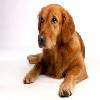

In [118]:
img = image.load_img('/tmp/test_dog.png' , target_size = (100, 100) )
img

In [119]:
print('rows - width , cols - height , channels - rgb')
img = image.img_to_array(img)
img = np.expand_dims(img , axis = 0) 
image_ = np.vstack([img]) 
image_.shape

rows - width , cols - height , channels - rgb


(1, 100, 100, 3)

In [32]:
print('CNN - Convolution Neural Network 합성곱 신경망 - ')
print('CNN 핵심 - 합성곱레이어와 풀링레이어')
print('padding  - valid , same')
print('filters     - 몇개의 필터를 이용할지를 결정 즉, 출력모양의 깊이')
print('kernel_size - 연산을 수행할 때 원도우의 크기')
print('strides     - 가로,세로로 움직이면서 내적 연산을 수행하는데 한번에 얼마나 움직일지를 결정')
model = Sequential() 

model.add( Conv2D(input_shape = (10, 10, 3) , 
                  filters = 10 , 
                  kernel_size = (3,3) , 
                  strides = (1,1) , 
                  padding = 'same') )

CNN - Convolution Neural Network 합성곱 신경망 - 
CNN 핵심 - 합성곱레이어와 풀링레이어
padding  - valid , same
filters     - 몇개의 필터를 이용할지를 결정 즉, 출력모양의 깊이
kernel_size - 연산을 수행할 때 원도우의 크기
strides     - 가로,세로로 움직이면서 내적 연산을 수행하는데 한번에 얼마나 움직일지를 결정


In [33]:
model.output_shape

(None, 10, 10, 10)

In [34]:
print('풀링 - pooling ')
print('원도우 내에서 출력의 최대값을 추출하는 맥스풀링, 평균값 뽑아내는 애버리지 풀링 - ')
print()

# model.add( MaxPooling2D(pool_size = (2,2) , strides=(1,1), padding = 'valid' ) )
# print(model.output_shape)

model.add( AveragePooling2D(pool_size = (2,2) , strides=(1,1), padding = 'valid' ) )
print(model.output_shape)


풀링 - pooling 
원도우 내에서 출력의 최대값을 추출하는 맥스풀링, 평균값 뽑아내는 애버리지 풀링 - 

(None, 9, 9, 10)


In [35]:
datasets = load_digits()
datasets.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [38]:
datasets.images[0].shape

(8, 8)

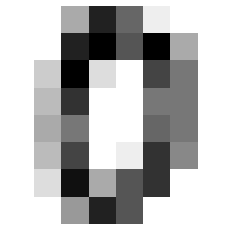

In [40]:
plt.figure()

plt.imshow(datasets.images[0] , cmap = plt.cm.binary)
plt.grid(False)
plt.axis('off')
plt.show()
plt.close()

In [41]:
datasets.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [42]:
X_data = datasets.images
y_data = datasets.target

In [43]:
X_data.shape , y_data.shape

((1797, 8, 8), (1797,))

In [45]:
X_data = X_data.reshape(X_data.shape[0] , X_data.shape[1]  , X_data.shape[2] , 1) 
X_data.shape , y_data.shape

((1797, 8, 8, 1), (1797,))

In [47]:
y_data = to_categorical(y_data)
y_data.shape

(1797, 10)

In [48]:
y_data[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [49]:
X_data.shape , y_data.shape

((1797, 8, 8, 1), (1797, 10))

In [50]:
X_train , X_test , y_train , y_test = train_test_split(X_data , 
                                                       y_data , 
                                                       test_size    = 0.2 ,
                                                       random_state = 111)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1437, 8, 8, 1), (360, 8, 8, 1), (1437, 10), (360, 10))

In [52]:
print('cnn 입력층 - ')
mnist_cnn_model = Sequential()
mnist_cnn_model.add( Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]) , 
                            filters = 10 , 
                            kernel_size = (3,3) , 
                            strides = (1,1) , 
                            padding = 'valid' , activation = 'relu') ) 

print('shape - ' , mnist_cnn_model.output_shape)

cnn 입력층 - 
shape -  (None, 6, 6, 10)


In [53]:
print('cnn 풀링레이어 만들기 - ')

mnist_cnn_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
print(mnist_cnn_model.output_shape)


cnn 풀링레이어 만들기 - 
(None, 3, 3, 10)


In [54]:
mnist_cnn_model.add( Flatten() )
mnist_cnn_model.output_shape

(None, 90)

In [55]:
mnist_cnn_model.add( Dense(50 , activation = 'relu'))
mnist_cnn_model.add( Dense(10 , activation = 'softmax'))

In [ ]:
mnist_cnn_model.summary()


In [57]:
mnist_cnn_model.compile(optimizer = Adam(learning_rate = 0.01), 
                      loss= 'categorical_crossentropy' , 
                      metrics=['accuracy'] ) 

In [ ]:
mnist_cnn_model_history = mnist_cnn_model.fit(X_train , y_train , epochs=100  , batch_size = 50 , validation_split = 0.2 , verbose = 1)

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(mnist_cnn_model_history.history['accuracy']    , 's-', label='acc')
plt.plot(mnist_cnn_model_history.history['val_accuracy'], 'd-', label='val_acc')

plt.legend(loc='best')
plt.xticks(np.arange(100))
plt.title('accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.close()

In [60]:
mnist_cnn_model_eval = mnist_cnn_model.evaluate(X_test , y_test)
mnist_cnn_model_eval

12/12 [==============================] - 0s 5ms/step - loss: 0.1667 - accuracy: 0.9639


[0.16671337187290192, 0.9638888835906982]

#### mnist 이용한 CNN

In [67]:
(X_train , y_train) , (X_test , y_test ) = mnist.load_data()
(X_train.shape , y_train.shape) , (X_test.shape , y_test.shape )

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [68]:
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , X_train.shape[2] , 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , X_test.shape[2] , 1)

In [69]:
(X_train.shape , y_train.shape) , (X_test.shape , y_test.shape )

(((60000, 28, 28, 1), (60000,)), ((10000, 28, 28, 1), (10000,)))

In [70]:
print('전처리 - ') 
X_train , X_test =  X_train/255.0 , X_test/255.0

전처리 - 


In [77]:
print('feature extraction - ')
mnist_cnn_model = Sequential()

mnist_cnn_model.add( Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]) , 
                            filters = 32 , 
                            kernel_size = (3,3) , 
                            strides = (1,1) , 
                            padding = 'same' , activation = 'relu') ) 
mnist_cnn_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'same' ) )
mnist_cnn_model.add( Conv2D(filters = 64 , 
                            kernel_size = (3,3) , 
                            strides = (1,1) , 
                            padding = 'same' , activation = 'relu') ) 
mnist_cnn_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'same' ) )
mnist_cnn_model.add( Conv2D(filters = 64 , 
                            kernel_size = (3,3) , 
                            strides = (1,1) , 
                            padding = 'same' , activation = 'relu') ) 
mnist_cnn_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'same' ) )



feature extraction - 


In [78]:
# mnist_cnn_model.summary()
mnist_cnn_model.output_shape

(None, 4, 4, 64)

In [80]:
print('Dense 층 추가 - ')
mnist_cnn_model.add( Flatten() )
mnist_cnn_model.add( Dense(units = 512) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 256) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 128) )
mnist_cnn_model.add( Activation('relu') )
mnist_cnn_model.add( Dense(units = 64) )
mnist_cnn_model.add( Activation('relu') )

mnist_cnn_model.add( Dense(units = 10) )
mnist_cnn_model.add( Activation('softmax') )


# mnist_cnn_model.output_shape


Dense 층 추가 - 


In [ ]:
mnist_cnn_model.summary()

In [83]:
mnist_cnn_model.compile(optimizer = Adam(learning_rate = 0.01), 
                      loss= 'sparse_categorical_crossentropy' , 
                      metrics=['accuracy'] ) 

In [85]:
mnist_cnn_model_history = mnist_cnn_model.fit(X_train , y_train , epochs=12  , batch_size = 50 , validation_split = 0.2 , verbose = 1)

Epoch 1/12
960/960 [==============================] - 4s 4ms/step - loss: 2.3021 - accuracy: 0.1119 - val_loss: 2.3036 - val_accuracy: 0.1060
Epoch 2/12
960/960 [==============================] - 4s 4ms/step - loss: 2.3021 - accuracy: 0.1123 - val_loss: 2.3033 - val_accuracy: 0.1060
Epoch 3/12
960/960 [==============================] - 4s 4ms/step - loss: 2.3022 - accuracy: 0.1108 - val_loss: 2.3037 - val_accuracy: 0.1060
Epoch 4/12
960/960 [==============================] - 4s 4ms/step - loss: 2.3021 - accuracy: 0.1131 - val_loss: 2.3036 - val_accuracy: 0.1060
Epoch 5/12
960/960 [==============================] - 4s 4ms/step - loss: 2.3022 - accuracy: 0.1124 - val_loss: 2.3029 - val_accuracy: 0.1060
Epoch 6/12
960/960 [==============================] - 4s 4ms/step - loss: 2.3023 - accuracy: 0.1127 - val_loss: 2.3031 - val_accuracy: 0.1060
Epoch 7/12
960/960 [==============================] - 4s 4ms/step - loss: 2.3021 - accuracy: 0.1124 - val_loss: 2.3034 - val_accuracy: 0.1060
Epoch 

In [86]:
print('모델 저장')
mnist_cnn_model.save('model-case.h12')

INFO:tensorflow:Assets written to: model-case.h12/assets


In [ ]:
print('모델 복원')
loaded_model = load_model('model-case.h12')
loaded_model.summary()

In [89]:
loss , acc = loaded_model.evaluate(X_test , y_test)
print('loss - ' , loss)
print('acc  - ' , acc)

313/313 [==============================] - 2s 5ms/step - loss: 2.3038 - accuracy: 0.1135
loss -  2.3037610054016113
acc  -  0.11349999904632568


#### 이미지 분류 (horse-or-human)

In [91]:
import os 

print('데이터 세트 경로 - ') 
train_horse_dir = '/tmp/horse-or-human/horses'
train_human_dir = '/tmp/horse-or-human/humans'

print('파일 이름 리스트 - ')

train_horse_fileName  = os.listdir(train_horse_dir)
train_human_fileName  = os.listdir(train_human_dir)

데이터 세트 경로 - 
파일 이름 리스트 - 


In [ ]:
train_horse_fileName[:10]

In [ ]:
train_human_fileName[:10]

In [95]:
print('총 이미지 갯수 - ')
print('horse len - ' , len(train_horse_fileName))
print('horse len - ' , len(train_human_fileName))

총 이미지 갯수 - 
horse len -  500
horse len -  527


In [97]:
train_img_generator = ImageDataGenerator(rescale=1/255)
train_generator = train_img_generator.flow_from_directory(
    '/tmp/horse-or-human' , 
    target_size = (300, 300) , 
    batch_size  = 128 ,
    class_mode = 'binary'
)

Found 1027 images belonging to 3 classes.


In [128]:
def img_model() :
  img_model = Sequential()

  img_model.add( Conv2D(input_shape = (300, 300, 3) , filters = 16 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )
      
  img_model.add( Conv2D(filters = 32 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Conv2D(filters = 64 , kernel_size = (3,3) , strides = (1,1) , padding = 'valid') )
  img_model.add( Activation('relu'))
  img_model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid' ) )
  img_model.add( Dropout(0.25) )

  img_model.add( Flatten() )
  img_model.add( Dense(units = 512) )
  img_model.add( Activation('relu') )
  img_model.add( Dropout(0.25) )
  
  img_model.add( Dense(units = 1) )
  img_model.add( Activation('sigmoid') )

  return img_model 


In [ ]:
model = img_model()
model.summary()

In [130]:
model.compile(optimizer = RMSprop(lr = 0.001), 
                      loss= 'binary_crossentropy' , 
                      metrics=['accuracy'] ) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [131]:
model_history = model.fit(train_generator , epochs = 15 , verbose = 1 , steps_per_epoch = 8 )


Epoch 1/15
8/8 [==============================] - 7s 730ms/step - loss: -72830.8750 - accuracy: 0.4761
Epoch 2/15
8/8 [==============================] - 6s 738ms/step - loss: -3405127.0000 - accuracy: 0.4839
Epoch 3/15
8/8 [==============================] - 6s 746ms/step - loss: -30980882.0000 - accuracy: 0.4839
Epoch 4/15
8/8 [==============================] - 6s 855ms/step - loss: -129682200.0000 - accuracy: 0.4928
Epoch 5/15
8/8 [==============================] - 6s 711ms/step - loss: -336299648.0000 - accuracy: 0.4894
Epoch 6/15
8/8 [==============================] - 6s 733ms/step - loss: -778134464.0000 - accuracy: 0.4828
Epoch 7/15
8/8 [==============================] - 6s 699ms/step - loss: -1527566976.0000 - accuracy: 0.4917
Epoch 8/15
8/8 [==============================] - 6s 724ms/step - loss: -2892243712.0000 - accuracy: 0.4905
Epoch 9/15
8/8 [==============================] - 6s 716ms/step - loss: -4896694784.0000 - accuracy: 0.4828
Epoch 10/15
8/8 [========================

In [132]:
from google.colab import files

upload_img = files.upload()
print(upload_img)
print(upload_img.keys())

for fn in upload_img.keys() :
  print('file name - ' , fn )
  path = '/content/'+fn
  img = image.load_img(path , target_size = (300, 300))
  x   = image.img_to_array(img) 
  x   = np.expand_dims(x , axis = 0 ) 
  image_ = np.vstack([x])

  classes = model.predict(image_ , batch_size = 10 ) 
  print('pred - ' , classes[0])
print('예측하기 - ')



Saving human01-11.png to human01-11 (1).png
{'human01-11.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x01,\x08\x06\x00\x00\x00y}\x8eu\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00 \x00IDATx\x9c\x94\xbdY\xb3%Ir\x1e\xf6yDd\xe6\xd9\xeeRu\xab\xaa\xab\xab\x97\xc1\x00\x03a!\x00B\x92Q0=h#)\xd3\x03i\x92~\x80LO\xfa!\xfc\x17\x92\xe9E&\xbd\x10f4\x9a\x89\x82\xf8@\x19)A\x18R\x1a\x10\x02F\xd8f\x06\x98\xc1t\xcftOo\xb5\xdf\xe5,\x99\x19\xe1zp\xf7\x88\xc8<\xe76\xa8\xd3V}\xcf\xc9\x8c\x8c\xf0\xf0p\xff\xc2\xdd\xc3#\x92~\xfb\xcf\x99\t\xf2a\x00\xc4\x00\x13`\xd7\xf2\x87\xf4\xbe\x96\xd3K \xfd\xc1v\x83\x00\xa7\x959\x02:\x0f,<\xd0x\xb9\xee\t\xf0N\x9e\xf5\x0e \x0f\xec\x07\xe0z\x07\xec\x06\xa0g`\xd4\xe7\x19\xc7\x1ffmW\xcb$*\xb4\xe4\xf2\xa7\x1e\xb4\xcb|\xff\xef\xfa\'\xd5\xd7I\xda\x9dW\x9b\xfb>-z\xb2a>Q\xce\xaeY_\x00 \xdd\xd7\x85\xaa-\xe3\x81\xd5K\xb3b\xf97\xcd\xda\xac\x07\xae\xfa\xa4\xba\xcc\x89>\xd4\xbc\xb6\xfb\x13Y\xa8\

#### 고양이 vs 개 이미지 분류 [실습]

In [133]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-04-27 05:25:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  32.5MB/s    in 2.0s    

2022-04-27 05:25:11 (32.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [134]:
import os
import zipfile

path = '/tmp/cats_and_dogs_filtered.zip' 
zip  = zipfile.ZipFile(path , 'r')

zip.extractall('/tmp')
zip.close()